# Program Pre-processing vs No pre-processing

In [62]:
import pandas as pd
import autogluon
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split
import os

In [63]:
npp_data = pd.read_csv("diabetes_dataset.csv")
pp_data = pd.read_csv("diabetes_dataset_DONE.csv", index_col=0)

In [64]:
npp_data

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,46,Male,Other,Graduate,Upper-Middle,Unemployed,Former,1,136,8.3,...,45,150,116,113,109,14.58,5.55,26.0,Pre-Diabetes,0
99996,41,Female,White,Graduate,Middle,Employed,Never,3,76,8.8,...,55,123,146,96,146,9.02,5.97,24.4,Pre-Diabetes,0
99997,57,Female,Black,No formal,Upper-Middle,Employed,Former,4,121,9.9,...,50,111,184,93,132,2.57,5.21,27.6,No Diabetes,0
99998,47,Female,Black,Highschool,Lower-Middle,Retired,Never,3,52,5.9,...,68,91,116,106,117,9.81,5.53,26.4,Pre-Diabetes,0


In [65]:
pp_data

,age,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,hdl_cholesterol,ldl_cholesterol,triglycerides,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes
0,0.582920,1.498336,-0.185459,0.849004,0.795161,0.751438,1.350962,0.360307,-0.225746,-1.316638,1.776348,0.571269,-0.538673,2.115277,-0.041006,1.0
1,-0.070949,0.464586,0.384537,-0.471241,1.123920,-1.207038,0.992705,0.109006,-0.350416,0.086051,-1.590201,-2.124606,-1.436257,-1.114741,-0.808223,0.0
4,-0.201723,-0.023575,0.669536,0.377488,-0.396590,-1.642255,-1.658392,-1.021850,-0.350416,-0.214526,0.705173,0.922905,0.774764,0.873937,-0.750100,1.0
5,-0.201723,0.191790,1.695529,-0.754151,-0.232211,-0.118996,-1.443439,0.737259,-1.597111,0.687203,0.521543,1.368310,-0.042531,-0.608072,-0.750100,0.0
6,1.694498,-0.827603,1.809528,0.754701,0.836256,0.533829,0.992705,0.234657,1.394958,-0.815678,1.806953,0.805693,0.239508,-1.608744,0.714586,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,0.255986,0.981461,-0.356458,-0.848454,-0.602065,0.316221,0.491146,2.245067,0.148263,-0.715486,0.215493,-0.553966,-0.946291,0.227933,-0.540859,1.0
99994,1.432950,-0.411231,0.156539,-0.094028,-0.478780,-0.118996,1.207659,-0.016644,-1.223103,-0.615294,-1.375966,-2.124606,-1.067753,0.633269,0.086863,1.0
99995,-0.201723,0.364082,1.296532,-0.565544,-0.602065,1.621872,0.777751,-0.142295,-0.849094,-0.915870,1.470298,-0.108560,1.153561,-1.216075,-0.459488,0.0
99996,-0.528657,-0.497377,1.581530,-0.188331,-0.478780,0.098613,1.064357,0.109006,-1.597111,0.086051,0.643963,0.594711,0.008936,-0.684072,-0.645480,0.0


In [66]:
from sklearn.feature_selection import mutual_info_classif

X = npp_data.drop("diagnosed_diabetes", axis=1)
y = npp_data["diagnosed_diabetes"]

npp_data.corr(numeric_only=True)["diagnosed_diabetes"].sort_values(ascending=False)

diagnosed_diabetes                    1.000000
hba1c                                 0.679397
glucose_postprandial                  0.629832
glucose_fasting                       0.510919
diabetes_risk_score                   0.277300
family_history_diabetes               0.197926
age                                   0.137713
bmi                                   0.097057
systolic_bp                           0.095481
waist_to_hip_ratio                    0.078918
ldl_cholesterol                       0.067475
cholesterol_total                     0.058173
insulin_level                         0.057715
triglycerides                         0.056230
diastolic_bp                          0.035619
cardiovascular_history                0.029793
hypertension_history                  0.027524
heart_rate                            0.022785
screen_time_hours_per_day             0.018127
alcohol_consumption_per_week          0.000760
sleep_hours_per_day                  -0.000399
diet_score   

In [67]:
# cols_to_drop = [
#     "family_history_diabetes",
#     "bmi",
#     "cholesterol_total",
#     "glucose_fasting",
#     "glucose_postprandial",
#     "diabetes_stage"
# ]

# npp_data = npp_data.drop(cols_to_drop, axis=1)

In [68]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X = npp_data.drop("diagnosed_diabetes", axis=1)
y = npp_data["diagnosed_diabetes"]

num_cols = X.select_dtypes(include=["number"]).columns
X_num = X[num_cols]

X_train, X_test, y_train, y_test = train_test_split(
    X_num, y, test_size=0.3, random_state=42, shuffle=True
)

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca  = pca.transform(X_test)

### 1. No pre-processing autogluon

In [74]:
train, test = train_test_split(
    npp_data,
    test_size=0.3,
    random_state=42,
    shuffle=True
)

train_data = TabularDataset(train)
predictor = TabularPredictor(
    label='diagnosed_diabetes', 
    path='modelePPvsNPP/NPP',
    eval_metric="roc_auc"
).fit(
    train_data, 
    presets="medium", 
    save_space=True, 
    keep_only_best=True)

test_data = TabularDataset(test)

predictions = predictor.predict(test_data)
print(predictions)

leaderboard = predictor.leaderboard()
print(leaderboard)

print(predictor.evaluate(train_data))



print("----------hiper-----------")

model_name = predictor.model_best
model_info = predictor.info()
model_info['model_info'][model_name]['hyperparameters']

Preset alias specified: 'medium' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.11.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          16
Pytorch Version:    2.9.1+cpu
CUDA Version:       CUDA is not available
Memory Avail:       11.50 GB / 31.93 GB (36.0%)
Disk Space Avail:   16.64 GB / 350.00 GB (4.8%)
Presets specified: ['medium']
Using hyperparameters preset: hyperparameters='default'


       age  gender ethnicity education_level  income_level employment_status  \
76513   43    Male  Hispanic      Highschool  Lower-Middle          Employed   
60406   34  Female     White        Graduate        Middle          Employed   
27322   41    Male  Hispanic        Graduate        Middle           Student   
53699   70    Male     White      Highschool  Upper-Middle        Unemployed   
65412   33    Male     Asian        Graduate  Lower-Middle          Employed   
...    ...     ...       ...             ...           ...               ...   
6265    52    Male  Hispanic        Graduate  Upper-Middle          Employed   
54886   45    Male  Hispanic    Postgraduate        Middle          Employed   
76820   44    Male     White    Postgraduate  Upper-Middle          Employed   
860     53  Female  Hispanic      Highschool        Middle          Employed   
15795   47  Female  Hispanic      Highschool  Upper-Middle        Unemployed   

      smoking_status  alcohol_consumpti

Beginning AutoGluon training ...
AutoGluon will save models to "c:\Users\User\Desktop\Programowanie\SUML\suml_15_grupa5\modelePPvsNPP\NPP"
Train Data Rows:    70000
Train Data Columns: 30
Label Column:       diagnosed_diabetes
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [np.int64(1), np.int64(0)]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])
Problem Type:       binary
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11792.42 MB
	Train Data (Original)  Memory Usage: 42.27 MB (0.4% of available memory)
	Inferring data type of each feature based on column values. Set feature_meta

[1000]	valid_set's binary_logloss: 5.96968e-06
[2000]	valid_set's binary_logloss: 2.52473e-06
[3000]	valid_set's binary_logloss: 2.06748e-06
[4000]	valid_set's binary_logloss: 1.9619e-06
[5000]	valid_set's binary_logloss: 1.91272e-06
[6000]	valid_set's binary_logloss: 1.68543e-06
[7000]	valid_set's binary_logloss: 1.56142e-06
[8000]	valid_set's binary_logloss: 1.58043e-06
[9000]	valid_set's binary_logloss: 1.55735e-06
[10000]	valid_set's binary_logloss: 1.55881e-06


	1.0	 = Validation score   (roc_auc)
	15.91s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM ...
	Fitting with cpus=8, gpus=0, mem=0.1/11.6 GB


[1000]	valid_set's binary_logloss: 1.98581e-06
[2000]	valid_set's binary_logloss: 1.48297e-06
[3000]	valid_set's binary_logloss: 1.37986e-06
[4000]	valid_set's binary_logloss: 1.33788e-06


	1.0	 = Validation score   (roc_auc)
	7.28s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: RandomForestGini ...
	Fitting with cpus=16, gpus=0, mem=0.3/11.6 GB
	1.0	 = Validation score   (roc_auc)
	1.41s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: RandomForestEntr ...
	Fitting with cpus=16, gpus=0, mem=0.3/11.6 GB
	1.0	 = Validation score   (roc_auc)
	1.36s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: CatBoost ...
	Fitting with cpus=8, gpus=0
	1.0	 = Validation score   (roc_auc)
	9.18s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	Fitting with cpus=16, gpus=0, mem=0.3/11.6 GB
	1.0	 = Validation score   (roc_auc)
	0.88s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	Fitting with cpus=16, gpus=0, mem=0.3/11.4 GB
	1.0	 = Validation score   (roc_auc)
	0.98s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	Fitting wi

[1000]	valid_set's binary_logloss: 5.37751e-06
[2000]	valid_set's binary_logloss: 3.94856e-06
[3000]	valid_set's binary_logloss: 3.40575e-06
[4000]	valid_set's binary_logloss: 3.20847e-06
[5000]	valid_set's binary_logloss: 3.04519e-06
[6000]	valid_set's binary_logloss: 3.03085e-06


	1.0	 = Validation score   (roc_auc)
	10.22s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Fitting 1 model on all data | Fitting with cpus=16, gpus=0, mem=0.0/11.5 GB
	Ensemble Weights: {'ExtraTreesGini': 1.0}
	1.0	 = Validation score   (roc_auc)
	0.08s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 131.39s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 64907.4 rows/s (2499 batch size)
Deleting model LightGBMXT. All files under c:\Users\User\Desktop\Programowanie\SUML\suml_15_grupa5\modelePPvsNPP\NPP\models\LightGBMXT will be removed.
Deleting model LightGBM. All files under c:\Users\User\Desktop\Programowanie\SUML\suml_15_grupa5\modelePPvsNPP\NPP\models\LightGBM will be removed.
Deleting model RandomForestGini. All files under c:\Users\User\Desktop\Programowanie\SUML\suml_15_grupa5\modelePPvsNPP\NPP\models\RandomForestGini will be removed.
Deleting model RandomForestEntr

75721    0
80184    1
19864    0
76699    0
92991    1
        ..
42648    0
86306    0
45466    1
63724    0
34122    1
Name: diagnosed_diabetes, Length: 30000, dtype: int64
                 model  score_val eval_metric  pred_time_val  fit_time  \
0       ExtraTreesGini        1.0     roc_auc       0.038001  0.877500   
1  WeightedEnsemble_L2        1.0     roc_auc       0.038501  0.954001   

   pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                0.038001           0.877500            1       True   
1                0.000500           0.076501            2       True   

   fit_order  
0          1  
1          2  
{'roc_auc': np.float64(1.0), 'accuracy': 1.0, 'balanced_accuracy': np.float64(1.0), 'mcc': 1.0, 'f1': 1.0, 'precision': 1.0, 'recall': 1.0}
----------hiper-----------


{'use_orig_features': False,
 'valid_stacker': True,
 'max_base_models': 0,
 'max_base_models_per_type': 'auto',
 'save_bag_folds': True,
 'stratify': 'auto',
 'bin': 'auto',
 'n_bins': None,
 'vary_seed_across_folds': False,
 'model_random_seed': 0}

### 2. Pre-processing autogluon

In [75]:
train, test = train_test_split(
    pp_data,
    test_size=0.3,
    random_state=42,
    shuffle=True
)

train_data = TabularDataset(train)

predictor = TabularPredictor(
    label='diagnosed_diabetes', 
    path='modelePPvsNPP/PP',
    eval_metric="roc_auc"
).fit(
    train_data, 
    presets="medium", 
    save_space=True, 
    keep_only_best=True)

test_data = TabularDataset(test)

predictions = predictor.predict(test_data)
print(predictions)

leaderboard = predictor.leaderboard()
print(leaderboard)

print(predictor.evaluate(train_data))



print("----------hiper-----------")

model_name = predictor.model_best
model_info = predictor.info()
model_info['model_info'][model_name]['hyperparameters']

Preset alias specified: 'medium' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.11.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          16
Pytorch Version:    2.9.1+cpu
CUDA Version:       CUDA is not available
Memory Avail:       11.49 GB / 31.93 GB (36.0%)
Disk Space Avail:   17.00 GB / 350.00 GB (4.9%)
Presets specified: ['medium']
Using hyperparameters preset: hyperparameters='default'
Beginning AutoGluon training ...
AutoGluon will save models to "c:\Users\User\Desktop\Programowanie\SUML\suml_15_grupa5\modelePPvsNPP\PP"
Train Data Rows:    58080
Train Data Columns: 15
Label Column:       diagnosed_diabetes
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [np.float64(1.0), np.float64(0.0)]
	If 'binary' is not the correct problem_type, please 

32333    1.0
95864    0.0
17463    0.0
62307    1.0
25672    1.0
        ... 
51860    0.0
32028    0.0
48920    0.0
35456    1.0
21412    1.0
Name: diagnosed_diabetes, Length: 24892, dtype: float64
                 model  score_val eval_metric  pred_time_val   fit_time  \
0  WeightedEnsemble_L2   0.942868     roc_auc       0.060499  32.443003   
1        LightGBMLarge   0.942658     roc_auc       0.004999   1.156500   
2             LightGBM   0.940283     roc_auc       0.003001   0.556001   
3       NeuralNetTorch   0.939194     roc_auc       0.004500  29.521500   
4       ExtraTreesEntr   0.936043     roc_auc       0.047499   1.122502   

   pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                0.000500           0.086500            2       True   
1                0.004999           1.156500            1       True   
2                0.003001           0.556001            1       True   
3                0.004500          29.521500            1     

{'use_orig_features': False,
 'valid_stacker': True,
 'max_base_models': 0,
 'max_base_models_per_type': 'auto',
 'save_bag_folds': True,
 'stratify': 'auto',
 'bin': 'auto',
 'n_bins': None,
 'vary_seed_across_folds': False,
 'model_random_seed': 0}

## Ewaluacja modeli AutoGluon vs baseline

In [76]:
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score
)
from matplotlib import pyplot as plt

In [89]:

LABEL = "diagnosed_diabetes"

npp_data = pd.read_csv("diabetes_dataset.csv")
pp_data = pd.read_csv("diabetes_dataset_DONE.csv", index_col=0)

OUT_DIR = "modelePPvsNPP"
NPP_PATH = os.path.join(OUT_DIR, "NPP")
PP_PATH  = os.path.join(OUT_DIR, "PP")

AG_PRESET = "medium_quality"
AG_METRIC = "roc_auc"

In [ ]:

train_npp, test_npp = train_test_split(
    npp_data, test_size=0.30, random_state=42, shuffle=True, stratify=npp_data[LABEL]
)
train_pp, test_pp = train_test_split(
    pp_data, test_size=0.30, random_state=42, shuffle=True, stratify=pp_data[LABEL]
)

predictor_npp = TabularPredictor.load(NPP_PATH)
predictor_pp  = TabularPredictor.load(PP_PATH)


def eval_ag_best(predictor, test_df, name):
    y_true = test_df[LABEL]

    X_test = test_df.drop(columns=[LABEL]).copy()
    test_data = TabularDataset(X_test)

    y_pred = predictor.predict(test_data)
    proba = predictor.predict_proba(test_data)

    y_proba = None
    if isinstance(proba, pd.DataFrame) and 1 in proba.columns:
        y_proba = proba[1].values
    elif hasattr(proba, "values"):
        # fallback
        y_proba = proba.values

    return {
        "dataset": name,
        "strategy": "AutoGluon(best)",
        "accuracy": accuracy_score(y_true, y_pred),
        "balanced_accuracy": balanced_accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "recall": recall_score(y_true, y_pred, zero_division=0),
        "f1": f1_score(y_true, y_pred, zero_division=0),
        "roc_auc": roc_auc_score(y_true, y_proba)
    }


ag_rows = [
    eval_ag_best(predictor_npp, test_npp, "NPP"),
    eval_ag_best(predictor_pp,  test_pp,  "PP")
]

ag_df = pd.DataFrame(ag_rows)

dummy_df = pd.read_csv("baseline_dummy_simple.csv")

results_df = pd.concat([dummy_df, ag_df], ignore_index=True)

display(results_df)

results_df.to_csv("comparison_baseline_vs_autogluon.csv", index=False)


,dataset,strategy,accuracy,balanced_accuracy,precision,recall,f1,roc_auc
0,NPP,DummyClassifier,0.599967,0.500000,0.599967,1.000000,0.749974,0.500000
1,PP,DummyClassifier,0.596135,0.500000,0.596135,1.000000,0.746973,0.500000
2,NPP,AutoGluon(best),0.999767,0.999792,0.999944,0.999667,0.999806,1.000000
3,PP,AutoGluon(best),0.921300,0.933831,0.999225,0.868657,0.929377,0.982849


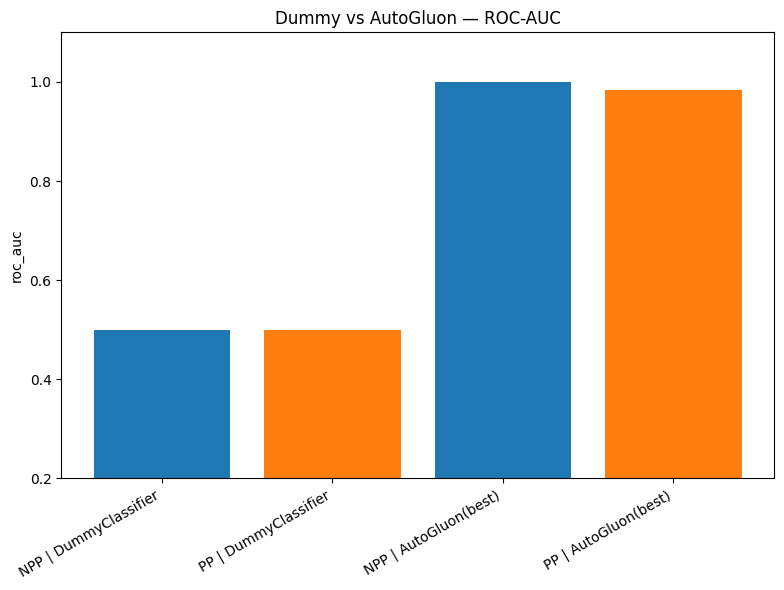

In [101]:
metric = "roc_auc"

plot_df = results_df.copy()

labels = plot_df["dataset"] + " | " + plot_df["strategy"]
values = plot_df[metric].astype(float)

colors = plot_df["dataset"].map({
    "NPP": "tab:blue",
    "PP": "tab:orange"
})

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=colors)
plt.ylabel(metric)
plt.title("Dummy vs AutoGluon — ROC-AUC")
plt.xticks(rotation=30, ha="right")
plt.ylim(0.2, 1.1)
plt.tight_layout()
plt.show()